In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tinycp.classifier import OOBBinaryMarginalConformalClassifier
from tinycp.plot import efficiency_curve, reliability_curve, histogram, confusion_matrix, beta_pdf_with_cdf_fill
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

In [2]:
weights = [0.2, 0.8]

X, y = make_classification(
    n_samples=100000, 
    n_features=20, 
    n_informative=2,      
    weights=weights, 
    random_state=42,
    n_redundant=2)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, oob_score=True,
                       random_state=42)

In [5]:
clf = OOBBinaryMarginalConformalClassifier(rf)
clf.fit(y_train)

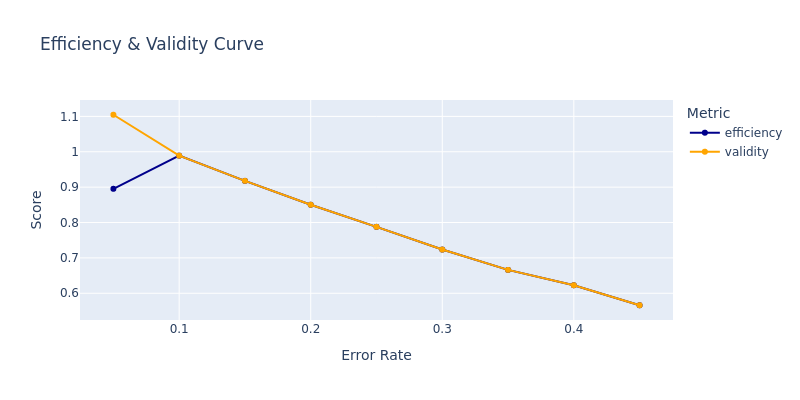

In [6]:
efficiency_curve(clf, X_test, "png")

In [7]:
clf.calibrate(X_calib, y_calib)

np.float64(0.04)

In [8]:
clf.evaluate(X_test, y_test)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,matthews_corrcoef,f1_score,alpha
0,0.829,1.171,0.0,0.036,0.233,0.067,0.003,1.0,0.023,0.67,0.919,0.04


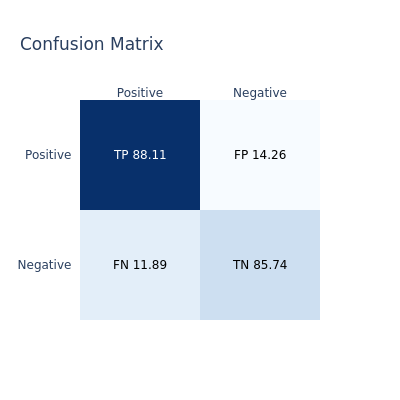

In [9]:
confusion_matrix(clf, X_test, y_test, fig_type="png")

Random Forest

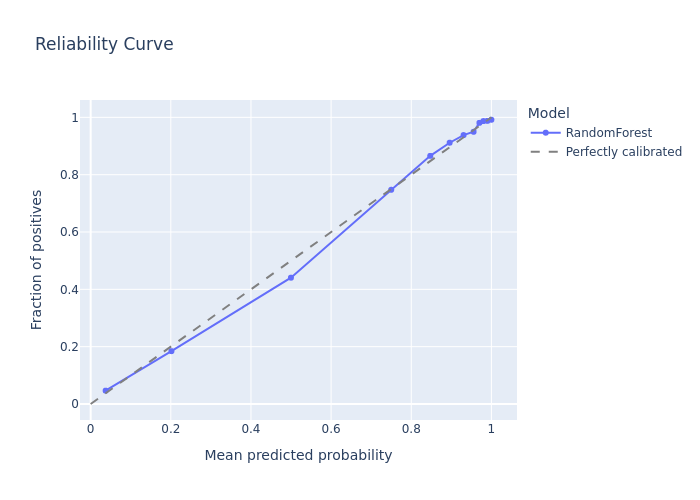

In [10]:
reliability_curve(clf.learner, X_test, y_test, 15, "png")

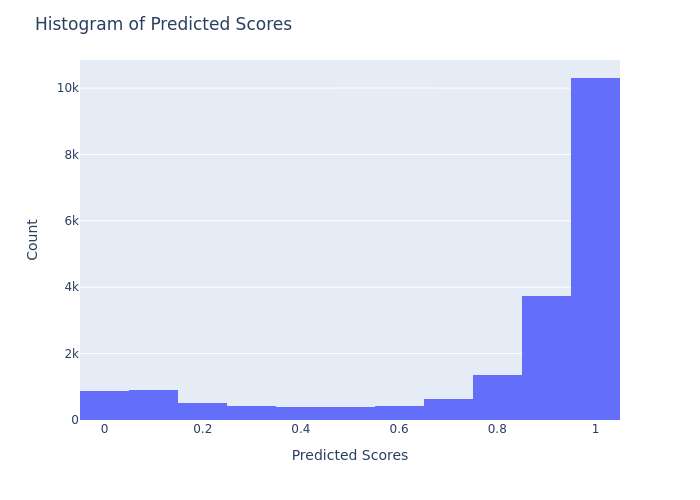

In [11]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

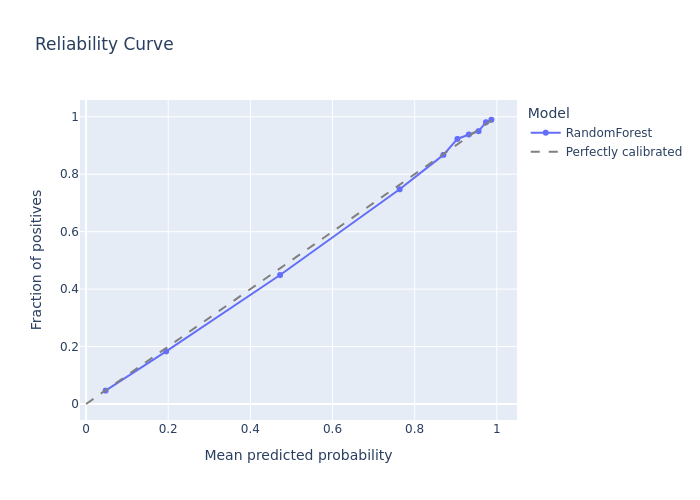

In [12]:
reliability_curve(clf, X_test, y_test, 15, "png")

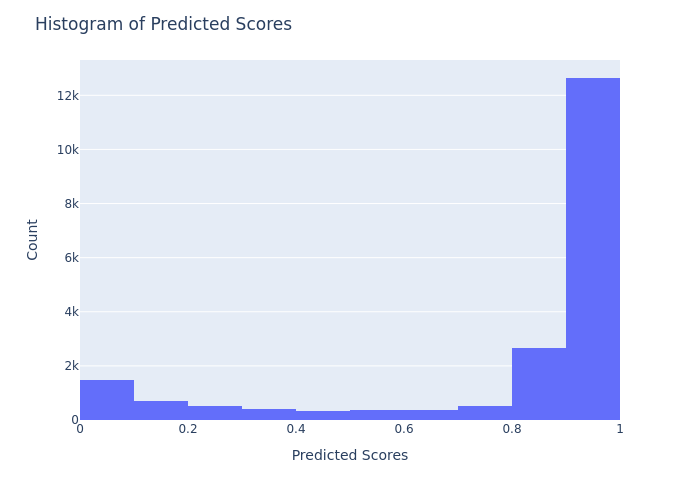

In [13]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [14]:
clf.evaluate(X_test, y_test, alpha=0.05)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,matthews_corrcoef,f1_score,alpha
0,0.895,1.105,0.0,0.051,0.233,0.067,0.003,1.0,0.003,0.67,0.936,0.05


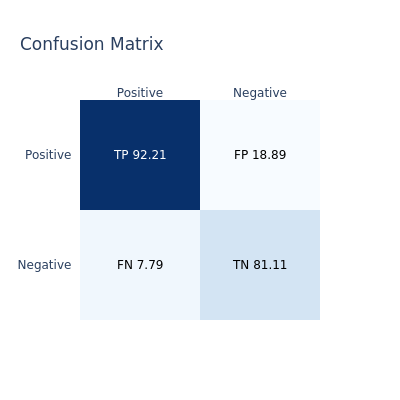

In [15]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [16]:
clf.evaluate(X_test, y_test, alpha=0.10)

,one_c,avg_c,empty,error,log_loss,brier_loss,ece,empirical_coverage,generalization,matthews_corrcoef,f1_score,alpha
0,0.989,0.989,0.011,0.093,0.233,0.067,0.003,1.0,0.002,0.67,0.946,0.1


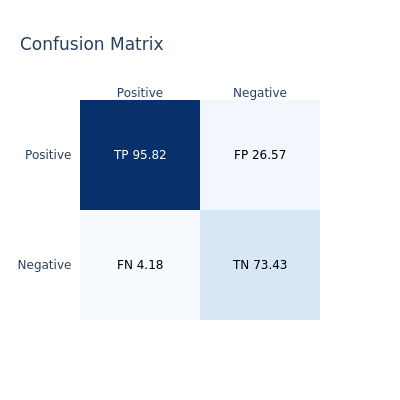

In [17]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")

In [18]:
tn, fp, fn, tp = sklearn_confusion_matrix(y_test, clf.predict(X_test)).ravel()

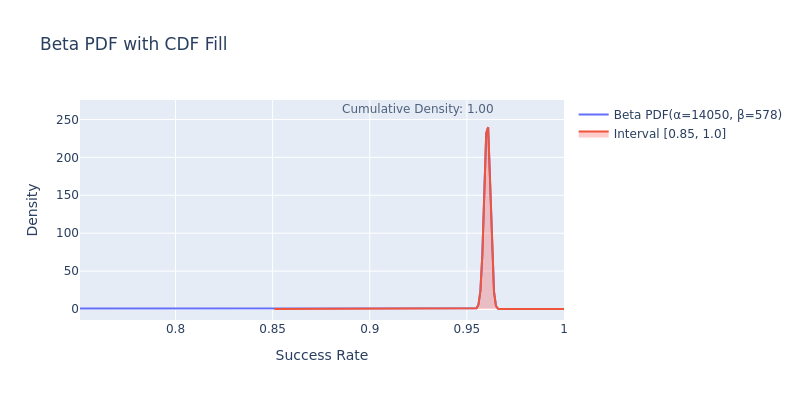

In [19]:
beta_pdf_with_cdf_fill(tp, fp, start=0.85, fig_type="png")

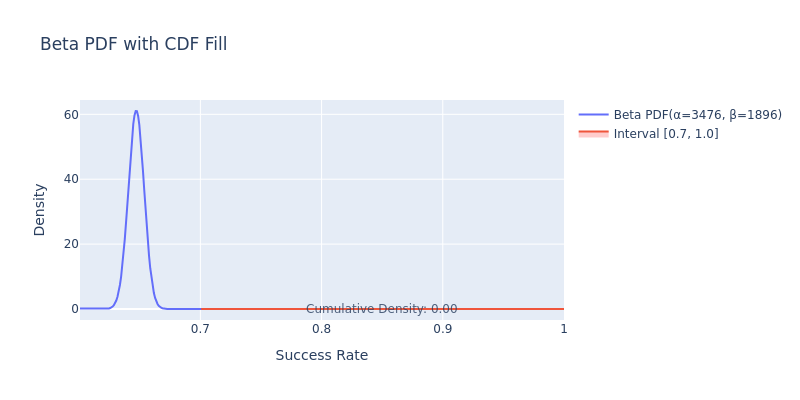

In [20]:
beta_pdf_with_cdf_fill(tn, fn, start=0.70, fig_type="png")